# car price prediction 
## Final Project Submission

Please fill out:
* Student name: DASARI SRUTHI
* Student pace: part time 
* Scheduled project review date/time: 15-12-2023
* Instructor name: HARDIK IDNANI
* Blog post URL:https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices


 ### import libraries and explore the data

In [4]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("Australian Vehicle Prices.csv")

In [6]:
data.head(3)

Brand    Year   Model               Car/Suv  \
0  Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1         MG  2022.0     MG3             Hatchback   
2        BMW  2022.0    430I                 Coupe   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   

         Engine DriveType FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD   Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front  Premium  6.7 L / 100 km         16  Black / Black   
2    4 cyl, 2 L      Rear  Premium  6.6 L / 100 km       8472   Grey / White   

         Location CylindersinEngine   BodyType     Doors     Seats   Price  
0  Caringbah, NSW             4 cyl        SUV   4 Doors   7 Seats   51990  
1  Brookvale, NSW             4 cyl  Hatchback   5 Doors   5 Seats   19990  
2   Sylvania, NSW             4 cyl      Coupe   2 Doors   4 Seats  108988

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

### explore data:

#### 1. explore engine column:

In [8]:
data['Engine'].unique

<bound method Series.unique of 0        4 cyl, 2.2 L
1        4 cyl, 1.5 L
2          4 cyl, 2 L
3        8 cyl, 5.5 L
4        4 cyl, 1.3 L
             ...     
16729               -
16730               -
16731    4 cyl, 1.6 L
16732      4 cyl, 2 L
16733      4 cyl, 2 L
Name: Engine, Length: 16734, dtype: object>

In [9]:
display(data.loc[data['Engine'] == '-'])

Brand    Year      Model             Car/Suv  \
5             Toyota  2004.0     Estima      ON FOUR WHEELS   
10            Toyota  2009.0      HiAce             Carbarn   
12             Honda  2015.0       City      USED Dealer ad   
13            Toyota  2017.0      HiAce      USED Dealer ad   
17        Mitsubishi  2013.0  Outlander  Exclusive Autohaus   
...              ...     ...        ...                 ...   
16712         Nissan  2010.0    Elgrand      USED Dealer ad   
16723         Suzuki  2022.0      Swift        NEW In stock   
16726         Toyota  2011.0     Estima          Topcar Rez   
16729         Toyota  2014.0    Alphard            SYC Cars   
16730  Mercedes-Benz  2012.0    S-Class      USED Dealer ad   

                                                   Title UsedOrNew  \
5                           2004 Toyota Estima T EDITION      USED   
10                          2009 Toyota HiAce (No Badge)      USED   
12     2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...      USED   
13                                     2017 Toyota HiAce      USED   
17                          2013 Mitsubishi Outlander ES      USED   
...                                                  ...       ...   
16712                                2010 Nissan Elgrand      USED   
16723                          2022 Suzuki Swift GL Plus       NEW   
16726                                 2011 Toyota Estima      USED   
16729                                2014 Toyota Alphard      USED   
16730             2012 Mercedes-Benz S-Class CDI BlueTEC      USED   

      Transmission Engine DriveType  FuelType FuelConsumption Kilometres  \
5        Automatic      -     Other  Unleaded               -     160230   
10       Automatic      -     Other  Unleaded               -     148190   
12       Automatic      -     Other  Unleaded               -     181745   
13       Automatic      -     Other         -               -     136296   
17          Manual      -     Other         -               -     120020   
...            ...    ...       ...       ...             ...        ...   
16712    Automatic      -     Other         -               -     132000   
16723    Automatic      -     Front  Unleaded               -         20   
16726    Automatic      -     Front  Unleaded               -      97000   
16729    Automatic      -     Front  Unleaded               -      66000   
16730    Automatic      -      Rear    Diesel               -     117432   

         ColourExtInt                Location CylindersinEngine    BodyType  \
5            Grey / -        Saint Marys, NSW                 -  Commercial   
10          White / -           Lidcombe, NSW                 -  Commercial   
12          Black / -         Rouse Hill, NSW                 -         NaN   
13      Silver / Grey           Lidcombe, NSW                 -         NaN   
17        Blue / Grey          Blacktown, NSW                 -       Wagon   
...               ...                     ...               ...         ...   
16712       White / -       Slacks Creek, QLD                 -         NaN   
16723  Silver / Black      Indooroopilly, QLD                 -   Hatchback   
16726      Silver / -  Holland Park West, QLD                 -       Wagon   
16729        Grey / -            Rocklea, QLD                 -  Commercial   
16730      Silver / -     Port Melbourne, VIC                 -         NaN   

          Doors Seats  Price  
5           NaN   NaN   9990  
10          NaN   NaN  42500  
12          NaN   NaN  11999  
13          NaN   NaN  38999  
17          NaN   NaN  13999  
...         ...   ...    ...  
16712       NaN   NaN  19000  
16723       NaN   NaN  28590  
16726   7 Seats   NaN  21989  
16729   7 Seats   NaN  29500  
16730       NaN   NaN  39888  

[1674 rows x 19 columns]

In [10]:
display(data.loc[data['Engine'].str.contains(r'L$') == True])

Brand    Year    Model               Car/Suv  \
0          Ssangyong  2022.0   Rexton  Sutherland Isuzu Ute   
1                 MG  2022.0      MG3             Hatchback   
2                BMW  2022.0     430I                 Coupe   
3      Mercedes-Benz  2011.0     E500                 Coupe   
4            Renault  2022.0   Arkana                   SUV   
...              ...     ...      ...                   ...   
16727        Hyundai  2015.0      I30                 Wagon   
16728         Nissan  2021.0  Qashqai                   SUV   
16731         Suzuki  2022.0   Vitara   Bremer Suzuki - New   
16732  Mercedes-Benz  2016.0   GLC250                   SUV   
16733  Mercedes-Benz  2021.0     C200                 Sedan   

                                           Title UsedOrNew Transmission  \
0           2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1      2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                          2022 BMW 430I M Sport      USED    Automatic   
3               2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                     2022 Renault Arkana Intens      USED    Automatic   
...                                          ...       ...          ...   
16727     2015 Hyundai I30 Tourer Active 1.6 GDI      USED    Automatic   
16728                     2021 Nissan Qashqai TI      USED    Automatic   
16731                    2022 Suzuki Vitara 1.6L      DEMO    Automatic   
16732                  2016 Mercedes-Benz GLC250      USED    Automatic   
16733                    2021 Mercedes-Benz C200      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
0      4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595   
1      4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16   
2        4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   
3      8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517   
4      4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   
...             ...       ...       ...             ...        ...   
16727  4 cyl, 1.6 L     Front  Unleaded  6.9 L / 100 km      54359   
16728    4 cyl, 2 L     Front  Unleaded  6.9 L / 100 km      32977   
16731  4 cyl, 1.6 L     Front  Unleaded  6.2 L / 100 km       5165   
16732    4 cyl, 2 L       AWD   Premium  7.2 L / 100 km      85525   
16733    4 cyl, 2 L      Rear  Unleaded    7 L / 100 km      31852   

                ColourExtInt             Location CylindersinEngine  \
0              White / Black       Caringbah, NSW             4 cyl   
1              Black / Black       Brookvale, NSW             4 cyl   
2               Grey / White        Sylvania, NSW             4 cyl   
3              White / Brown    Mount Druitt, NSW             8 cyl   
4               Grey / Black     Castle Hill, NSW             4 cyl   
...                      ...                  ...               ...   
16727  Silver / Black  Cloth  Oakleigh South, VIC             4 cyl   
16728              White / -         Rocklea, QLD             4 cyl   
16731             Yellow / -         Dinmore, QLD             4 cyl   
16732           Grey / Black          Albion, QLD             4 cyl   
16733               Gold / -          Yatala, QLD             4 cyl   

        BodyType     Doors     Seats   Price  
0            SUV   4 Doors   7 Seats   51990  
1      Hatchback   5 Doors   5 Seats   19990  
2          Coupe   2 Doors   4 Seats  108988  
3          Coupe   2 Doors   4 Seats   32990  
4            SUV   4 Doors   5 Seats   34990  
...          ...       ...       ...     ...  
16727      Wagon   4 Doors   5 Seats   21450  
16728        SUV   4 Doors   5 Seats   36770  
16731        SUV   4 Doors   5 Seats   35280  
16732        SUV   4 Doors   5 Seats   41888  
16733      Sedan   4 Doors   5 Seats   65888  

[15058 rows x 19 columns]

In [11]:
display(data.loc[data['Engine'].str.contains(r'(^-$)|(L$)') != True])

Brand    Year   Model             Car/Suv                      Title  \
2391       NaN     NaN     NaN                 NaN                        NaN   
8756  Mahindra  2023.0  XUV700  Toowoomba Mahindra  2023 Mahindra XUV700 AX7L   

     UsedOrNew Transmission Engine DriveType FuelType FuelConsumption  \
2391       NaN          NaN    NaN       NaN      NaN             NaN   
8756      DEMO    Automatic  4 cyl     Front        -  8.3 L / 100 km   

     Kilometres ColourExtInt        Location CylindersinEngine BodyType  \
2391        NaN          NaN             NaN               NaN      NaN   
8756         83  Red / White  Toowoomba, QLD             4 cyl      SUV   

         Doors     Seats  Price  
2391       NaN       NaN    NaN  
8756   4 Doors   7 Seats  40290

In [12]:
def engine(x):
    return x.str.extract(r'([0-9.]+) L').set_axis(['Engine'], axis = 1)

In [13]:
data['Engine'] = engine(data['Engine'])
data['Engine']

0        2.2
1        1.5
2          2
3        5.5
4        1.3
        ... 
16729    NaN
16730    NaN
16731    1.6
16732      2
16733      2
Name: Engine, Length: 16734, dtype: object

#### 2. explore fuel consumption column:


In [14]:
data['FuelConsumption'].unique

<bound method Series.unique of 0        8.7 L / 100 km
1        6.7 L / 100 km
2        6.6 L / 100 km
3         11 L / 100 km
4          6 L / 100 km
              ...      
16729                 -
16730                 -
16731    6.2 L / 100 km
16732    7.2 L / 100 km
16733      7 L / 100 km
Name: FuelConsumption, Length: 16734, dtype: object>

In [15]:
data.loc[data['FuelConsumption'] == '-']

Brand    Year      Model             Car/Suv  \
5             Toyota  2004.0     Estima      ON FOUR WHEELS   
10            Toyota  2009.0      HiAce             Carbarn   
12             Honda  2015.0       City      USED Dealer ad   
13            Toyota  2017.0      HiAce      USED Dealer ad   
17        Mitsubishi  2013.0  Outlander  Exclusive Autohaus   
...              ...     ...        ...                 ...   
16712         Nissan  2010.0    Elgrand      USED Dealer ad   
16723         Suzuki  2022.0      Swift        NEW In stock   
16726         Toyota  2011.0     Estima          Topcar Rez   
16729         Toyota  2014.0    Alphard            SYC Cars   
16730  Mercedes-Benz  2012.0    S-Class      USED Dealer ad   

                                                   Title UsedOrNew  \
5                           2004 Toyota Estima T EDITION      USED   
10                          2009 Toyota HiAce (No Badge)      USED   
12     2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...      USED   
13                                     2017 Toyota HiAce      USED   
17                          2013 Mitsubishi Outlander ES      USED   
...                                                  ...       ...   
16712                                2010 Nissan Elgrand      USED   
16723                          2022 Suzuki Swift GL Plus       NEW   
16726                                 2011 Toyota Estima      USED   
16729                                2014 Toyota Alphard      USED   
16730             2012 Mercedes-Benz S-Class CDI BlueTEC      USED   

      Transmission Engine DriveType  FuelType FuelConsumption Kilometres  \
5        Automatic    NaN     Other  Unleaded               -     160230   
10       Automatic    NaN     Other  Unleaded               -     148190   
12       Automatic    NaN     Other  Unleaded               -     181745   
13       Automatic    NaN     Other         -               -     136296   
17          Manual    NaN     Other         -               -     120020   
...            ...    ...       ...       ...             ...        ...   
16712    Automatic    NaN     Other         -               -     132000   
16723    Automatic    NaN     Front  Unleaded               -         20   
16726    Automatic    NaN     Front  Unleaded               -      97000   
16729    Automatic    NaN     Front  Unleaded               -      66000   
16730    Automatic    NaN      Rear    Diesel               -     117432   

         ColourExtInt                Location CylindersinEngine    BodyType  \
5            Grey / -        Saint Marys, NSW                 -  Commercial   
10          White / -           Lidcombe, NSW                 -  Commercial   
12          Black / -         Rouse Hill, NSW                 -         NaN   
13      Silver / Grey           Lidcombe, NSW                 -         NaN   
17        Blue / Grey          Blacktown, NSW                 -       Wagon   
...               ...                     ...               ...         ...   
16712       White / -       Slacks Creek, QLD                 -         NaN   
16723  Silver / Black      Indooroopilly, QLD                 -   Hatchback   
16726      Silver / -  Holland Park West, QLD                 -       Wagon   
16729        Grey / -            Rocklea, QLD                 -  Commercial   
16730      Silver / -     Port Melbourne, VIC                 -         NaN   

          Doors Seats  Price  
5           NaN   NaN   9990  
10          NaN   NaN  42500  
12          NaN   NaN  11999  
13          NaN   NaN  38999  
17          NaN   NaN  13999  
...         ...   ...    ...  
16712       NaN   NaN  19000  
16723       NaN   NaN  28590  
16726   7 Seats   NaN  21989  
16729   7 Seats   NaN  29500  
16730       NaN   NaN  39888  

[1697 rows x 19 columns]

In [16]:
data.loc[data['FuelConsumption'].str.fullmatch(r'[0-9.]+ L / 100 km') == True]

Brand    Year    Model               Car/Suv  \
0          Ssangyong  2022.0   Rexton  Sutherland Isuzu Ute   
1                 MG  2022.0      MG3             Hatchback   
2                BMW  2022.0     430I                 Coupe   
3      Mercedes-Benz  2011.0     E500                 Coupe   
4            Renault  2022.0   Arkana                   SUV   
...              ...     ...      ...                   ...   
16727        Hyundai  2015.0      I30                 Wagon   
16728         Nissan  2021.0  Qashqai                   SUV   
16731         Suzuki  2022.0   Vitara   Bremer Suzuki - New   
16732  Mercedes-Benz  2016.0   GLC250                   SUV   
16733  Mercedes-Benz  2021.0     C200                 Sedan   

                                           Title UsedOrNew Transmission  \
0           2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1      2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                          2022 BMW 430I M Sport      USED    Automatic   
3               2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                     2022 Renault Arkana Intens      USED    Automatic   
...                                          ...       ...          ...   
16727     2015 Hyundai I30 Tourer Active 1.6 GDI      USED    Automatic   
16728                     2021 Nissan Qashqai TI      USED    Automatic   
16731                    2022 Suzuki Vitara 1.6L      DEMO    Automatic   
16732                  2016 Mercedes-Benz GLC250      USED    Automatic   
16733                    2021 Mercedes-Benz C200      USED    Automatic   

      Engine DriveType  FuelType FuelConsumption Kilometres  \
0        2.2       AWD    Diesel  8.7 L / 100 km       5595   
1        1.5     Front   Premium  6.7 L / 100 km         16   
2          2      Rear   Premium  6.6 L / 100 km       8472   
3        5.5      Rear   Premium   11 L / 100 km     136517   
4        1.3     Front  Unleaded    6 L / 100 km       1035   
...      ...       ...       ...             ...        ...   
16727    1.6     Front  Unleaded  6.9 L / 100 km      54359   
16728      2     Front  Unleaded  6.9 L / 100 km      32977   
16731    1.6     Front  Unleaded  6.2 L / 100 km       5165   
16732      2       AWD   Premium  7.2 L / 100 km      85525   
16733      2      Rear  Unleaded    7 L / 100 km      31852   

                ColourExtInt             Location CylindersinEngine  \
0              White / Black       Caringbah, NSW             4 cyl   
1              Black / Black       Brookvale, NSW             4 cyl   
2               Grey / White        Sylvania, NSW             4 cyl   
3              White / Brown    Mount Druitt, NSW             8 cyl   
4               Grey / Black     Castle Hill, NSW             4 cyl   
...                      ...                  ...               ...   
16727  Silver / Black  Cloth  Oakleigh South, VIC             4 cyl   
16728              White / -         Rocklea, QLD             4 cyl   
16731             Yellow / -         Dinmore, QLD             4 cyl   
16732           Grey / Black          Albion, QLD             4 cyl   
16733               Gold / -          Yatala, QLD             4 cyl   

        BodyType     Doors     Seats   Price  
0            SUV   4 Doors   7 Seats   51990  
1      Hatchback   5 Doors   5 Seats   19990  
2          Coupe   2 Doors   4 Seats  108988  
3          Coupe   2 Doors   4 Seats   32990  
4            SUV   4 Doors   5 Seats   34990  
...          ...       ...       ...     ...  
16727      Wagon   4 Doors   5 Seats   21450  
16728        SUV   4 Doors   5 Seats   36770  
16731        SUV   4 Doors   5 Seats   35280  
16732        SUV   4 Doors   5 Seats   41888  
16733      Sedan   4 Doors   5 Seats   65888  

[15036 rows x 19 columns]

In [17]:
def fuelconsumption(x):
    return x.str.extract(r'([0-9.]+) L / 100 km').set_axis(['FuelConsumption'], axis = 1)

In [18]:
data['FuelConsumption'] = fuelconsumption(data['FuelConsumption'])

#### 3. explore kilometers column

In [19]:
data['Kilometres'].unique

<bound method Series.unique of 0          5595
1            16
2          8472
3        136517
4          1035
          ...  
16729     66000
16730    117432
16731      5165
16732     85525
16733     31852
Name: Kilometres, Length: 16734, dtype: object>

In [20]:
data[data['Kilometres'].str.fullmatch(r'[0-9]+')!= True]

Brand    Year   Model                        Car/Suv  \
1573      Renault  2023.0  Megane              Macarthur Renault   
2036      Renault  2023.0  Captur              Macarthur Renault   
2073      Renault  2023.0  Captur              Macarthur Renault   
2250   Volkswagen  2023.0  Tiguan  Liverpool Volkswagen New Cars   
2373       Toyota  2002.0   Crown                 03 **** ****\n   
...           ...     ...     ...                            ...   
16629      Suzuki  2022.0   Swift       Moreton Bay Suzuki - New   
16632       Mazda  2023.0    CX-8      Brighton Mazda New & Demo   
16642      Suzuki  2022.0   Ignis       Moreton Bay Suzuki - New   
16651      Suzuki  2022.0   Swift                 Q Suzuki - New   
16661     Hyundai  2023.0    Kona               Brighton Hyundai   

                                    Title UsedOrNew Transmission Engine  \
1573      2023 Renault Megane R.s. Trophy       NEW       Manual    1.8   
2036        2023 Renault Captur R.s. Line       NEW    Automatic    1.3   
2073        2023 Renault Captur R.s. Line       NEW    Automatic    1.3   
2250      2023 Volkswagen Tiguan 235TSI R       NEW    Automatic      2   
2373          2002 Toyota Crown Athlete V      USED    Automatic    NaN   
...                                   ...       ...          ...    ...   
16629  2022 Suzuki Swift Sport Navi Turbo       NEW       Manual    1.4   
16632   2023 Mazda CX-8 G25 Touring (fwd)       NEW    Automatic    2.5   
16642                2022 Suzuki Ignis GL       NEW    Automatic    1.2   
16651              2022 Suzuki Swift GL S       NEW    Automatic    1.2   
16661         2023 Hyundai Kona N Premium       NEW    Automatic      2   

      DriveType  FuelType FuelConsumption Kilometres           ColourExtInt  \
1573      Front         -             8.3          -             Yellow / -   
2036      Front         -             6.6          -   Grey / Diamond Black   
2073      Front         -             6.6          -                Red / -   
2250        AWD   Premium             8.8          -               Blue / -   
2373      Other  Unleaded             NaN          -           Black / Grey   
...         ...       ...             ...        ...                    ...   
16629     Front  Unleaded             6.1          -               Blue / -   
16632     Front         -             8.1          -  White / Black Leather   
16642     Front   Premium             4.9          -                Red / -   
16651     Front  Unleaded             4.8          -               Grey / -   
16661     Front   Premium               9          -           Grey / Black   

               Location CylindersinEngine   BodyType     Doors     Seats  \
1573      Narellan, NSW             4 cyl  Hatchback   5 Doors   5 Seats   
2036      Narellan, NSW             4 cyl        SUV   4 Doors   4 Seats   
2073      Narellan, NSW             4 cyl        SUV   4 Doors   4 Seats   
2250     Liverpool, NSW             4 cyl        SUV   4 Doors   5 Seats   
2373      Braeside, VIC                 -        NaN       NaN       NaN   
...                 ...               ...        ...       ...       ...   
16629     Capalaba, QLD             4 cyl  Hatchback   5 Doors   5 Seats   
16632     Brighton, VIC             4 cyl        SUV   4 Doors   7 Seats   
16642     Capalaba, QLD             4 cyl        SUV   4 Doors   5 Seats   
16651   Springwood, QLD             4 cyl  Hatchback   5 Doors   5 Seats   
16661  Elsternwick, VIC             4 cyl        SUV   4 Doors   5 Seats   

       Price  
1573   71490  
2036   43000  
2073   43000  
2250   85990  
2373   24888  
...      ...  
16629  34690  
16632  54725  
16642  24485  
16651  27690  
16661  57600  

[592 rows x 19 columns]

In [21]:
data.loc[data['Kilometres'].str.fullmatch(r'(-)|([0-9]+)') != True]

Brand    Year   Model                 Car/Suv  \
2391       NaN     NaN     NaN                     NaN   
14765  Renault  2023.0  Arkana  NEW Available to order   
14767   Toyota  2023.0   HiAce  NEW Available to order   
14769     Land  2023.0   Rover  NEW Available to order   
14771    Mazda  2023.0       6  NEW Available to order   
...        ...     ...     ...                     ...   
15506    Iveco  2023.0   Daily  NEW Available to order   
15509    Iveco  2023.0   Daily  NEW Available to order   
15511    Iveco  2023.0   Daily  NEW Available to order   
15514    Iveco  2023.0   Daily  NEW Available to order   
15517    Iveco  2023.0   Daily  NEW Available to order   

                                             Title UsedOrNew Transmission  \
2391                                           NaN       NaN          NaN   
14765                      2023 Renault Arkana ZEN       NEW    Automatic   
14767   2023 Toyota HiAce Slwb Commuter (12 Seats)       NEW    Automatic   
14769   2023 Land Rover Defender 90 D250 S (183KW)       NEW    Automatic   
14771                       2023 Mazda 6 G25 Sport       NEW    Automatic   
...                                            ...       ...          ...   
15506       2023 Iveco Daily E6 50C18 DRW (WB4350)       NEW    Automatic   
15509  2023 Iveco Daily E6 35S18V H2 SRW (WB3520L)       NEW       Manual   
15511       2023 Iveco Daily E6 50C18 DRW (WB3450)       NEW    Automatic   
15514       2023 Iveco Daily E6 70C21 DRW (WB3750)       NEW    Automatic   
15517       2023 Iveco Daily E6 70C18 DRW (WB3750)       NEW    Automatic   

      Engine DriveType  FuelType FuelConsumption Kilometres  \
2391     NaN       NaN       NaN             NaN        NaN   
14765    1.3     Front         -               6      - / -   
14767    2.8      Rear    Diesel               0      - / -   
14769      3       AWD    Diesel             7.9      - / -   
14771    2.5     Front  Unleaded               7      - / -   
...      ...       ...       ...             ...        ...   
15506      3      Rear    Diesel               0      - / -   
15509      3      Rear    Diesel               0      - / -   
15511      3      Rear    Diesel               0      - / -   
15514      3      Rear    Diesel               0      - / -   
15517      3      Rear    Diesel               0      - / -   

                 ColourExtInt Location CylindersinEngine      BodyType  \
2391                      NaN      NaN               NaN           NaN   
14765  5 years / Unlimited km      NaN             4 cyl           SUV   
14767  5 years / Unlimited km      NaN             4 cyl  People Mover   
14769  5 years / Unlimited km      NaN             6 cyl           SUV   
14771  5 years / Unlimited km      NaN             4 cyl         Wagon   
...                       ...      ...               ...           ...   
15506    3 years / 200,000 km      NaN             4 cyl    Ute / Tray   
15509    3 years / 200,000 km      NaN             4 cyl    Commercial   
15511    3 years / 200,000 km      NaN             4 cyl    Ute / Tray   
15514    3 years / 200,000 km      NaN             4 cyl    Ute / Tray   
15517    3 years / 200,000 km      NaN             4 cyl    Ute / Tray   

          Doors      Seats  Price  
2391        NaN        NaN    NaN  
14765   4 Doors    5 Seats  37500  
14767   3 Doors   12 Seats  69760  
14769   3 Doors    5 Seats  97700  
14771   4 Doors    5 Seats  36840  
...         ...        ...    ...  
15506   2 Doors    3 Seats  71559  
15509   3 Doors    3 Seats  70202  
15511   4 Doors    6 Seats  75789  
15514   2 Doors    3 Seats  83909  
15517   4 Doors    6 Seats  86714  

[450 rows x 19 columns]

In [22]:
def kilometres(x):
    return x.str.extract(r'([0-9]+)').set_axis(['Kilometres'], axis = 1)

In [23]:
data['Kilometres'] = kilometres(data['Kilometres'])

#### 4. explore location column

In [24]:
data['Location'].unique

<bound method Series.unique of 0             Caringbah, NSW
1             Brookvale, NSW
2              Sylvania, NSW
3          Mount Druitt, NSW
4           Castle Hill, NSW
                ...         
16729           Rocklea, QLD
16730    Port Melbourne, VIC
16731           Dinmore, QLD
16732            Albion, QLD
16733            Yatala, QLD
Name: Location, Length: 16734, dtype: object>

In [25]:
def location(x):
    return x.str.split(', ', n = 1, expand = True).set_axis(['City', 'State'], axis = 1 )

In [26]:
location = location(data['Location'])

In [27]:
data[['city', 'state']] = location

In [28]:
data = data.drop(['Location'], axis= 1)

#### 5. explore Cylinders in engine column 

In [29]:
data['CylindersinEngine'].unique

<bound method Series.unique of 0        4 cyl
1        4 cyl
2        4 cyl
3        8 cyl
4        4 cyl
         ...  
16729        -
16730        -
16731    4 cyl
16732    4 cyl
16733    4 cyl
Name: CylindersinEngine, Length: 16734, dtype: object>

In [30]:
data.loc[data['CylindersinEngine'] == '-']

Brand    Year      Model             Car/Suv  \
5             Toyota  2004.0     Estima      ON FOUR WHEELS   
10            Toyota  2009.0      HiAce             Carbarn   
12             Honda  2015.0       City      USED Dealer ad   
13            Toyota  2017.0      HiAce      USED Dealer ad   
17        Mitsubishi  2013.0  Outlander  Exclusive Autohaus   
...              ...     ...        ...                 ...   
16712         Nissan  2010.0    Elgrand      USED Dealer ad   
16723         Suzuki  2022.0      Swift        NEW In stock   
16726         Toyota  2011.0     Estima          Topcar Rez   
16729         Toyota  2014.0    Alphard            SYC Cars   
16730  Mercedes-Benz  2012.0    S-Class      USED Dealer ad   

                                                   Title UsedOrNew  \
5                           2004 Toyota Estima T EDITION      USED   
10                          2009 Toyota HiAce (No Badge)      USED   
12     2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...      USED   
13                                     2017 Toyota HiAce      USED   
17                          2013 Mitsubishi Outlander ES      USED   
...                                                  ...       ...   
16712                                2010 Nissan Elgrand      USED   
16723                          2022 Suzuki Swift GL Plus       NEW   
16726                                 2011 Toyota Estima      USED   
16729                                2014 Toyota Alphard      USED   
16730             2012 Mercedes-Benz S-Class CDI BlueTEC      USED   

      Transmission Engine DriveType  FuelType FuelConsumption Kilometres  \
5        Automatic    NaN     Other  Unleaded             NaN     160230   
10       Automatic    NaN     Other  Unleaded             NaN     148190   
12       Automatic    NaN     Other  Unleaded             NaN     181745   
13       Automatic    NaN     Other         -             NaN     136296   
17          Manual    NaN     Other         -             NaN     120020   
...            ...    ...       ...       ...             ...        ...   
16712    Automatic    NaN     Other         -             NaN     132000   
16723    Automatic    NaN     Front  Unleaded             NaN         20   
16726    Automatic    NaN     Front  Unleaded             NaN      97000   
16729    Automatic    NaN     Front  Unleaded             NaN      66000   
16730    Automatic    NaN      Rear    Diesel             NaN     117432   

         ColourExtInt CylindersinEngine    BodyType     Doors Seats  Price  \
5            Grey / -                 -  Commercial       NaN   NaN   9990   
10          White / -                 -  Commercial       NaN   NaN  42500   
12          Black / -                 -         NaN       NaN   NaN  11999   
13      Silver / Grey                 -         NaN       NaN   NaN  38999   
17        Blue / Grey                 -       Wagon       NaN   NaN  13999   
...               ...               ...         ...       ...   ...    ...   
16712       White / -                 -         NaN       NaN   NaN  19000   
16723  Silver / Black                 -   Hatchback       NaN   NaN  28590   
16726      Silver / -                 -       Wagon   7 Seats   NaN  21989   
16729        Grey / -                 -  Commercial   7 Seats   NaN  29500   
16730      Silver / -                 -         NaN       NaN   NaN  39888   

                    city state  
5            Saint Marys   NSW  
10              Lidcombe   NSW  
12            Rouse Hill   NSW  
13              Lidcombe   NSW  
17             Blacktown   NSW  
...                  ...   ...  
16712       Slacks Creek   QLD  
16723      Indooroopilly   QLD  
16726  Holland Park West   QLD  
16729            Rocklea   QLD  
16730     Port Melbourne   VIC  

[1674 rows x 20 columns]

In [31]:
def cylinder(x):
    return x.str.extract(r'([0-9]+) cyl').set_axis(['CylindersinEngine'], axis = 1 )

In [32]:
data['CylindersinEngine'] = cylinder(data['CylindersinEngine'])

#### 6. explore doors column

In [33]:
data['Doors'].unique

<bound method Series.unique of 0         4 Doors
1         5 Doors
2         2 Doors
3         2 Doors
4         4 Doors
           ...   
16729     7 Seats
16730         NaN
16731     4 Doors
16732     4 Doors
16733     4 Doors
Name: Doors, Length: 16734, dtype: object>

In [34]:
data.loc[data['Doors'].str.fullmatch(r' [0-9]+ Doors') != True]

Brand    Year      Model             Car/Suv  \
5             Toyota  2004.0     Estima      ON FOUR WHEELS   
10            Toyota  2009.0      HiAce             Carbarn   
12             Honda  2015.0       City      USED Dealer ad   
13            Toyota  2017.0      HiAce      USED Dealer ad   
17        Mitsubishi  2013.0  Outlander  Exclusive Autohaus   
...              ...     ...        ...                 ...   
16712         Nissan  2010.0    Elgrand      USED Dealer ad   
16723         Suzuki  2022.0      Swift        NEW In stock   
16726         Toyota  2011.0     Estima          Topcar Rez   
16729         Toyota  2014.0    Alphard            SYC Cars   
16730  Mercedes-Benz  2012.0    S-Class      USED Dealer ad   

                                                   Title UsedOrNew  \
5                           2004 Toyota Estima T EDITION      USED   
10                          2009 Toyota HiAce (No Badge)      USED   
12     2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...      USED   
13                                     2017 Toyota HiAce      USED   
17                          2013 Mitsubishi Outlander ES      USED   
...                                                  ...       ...   
16712                                2010 Nissan Elgrand      USED   
16723                          2022 Suzuki Swift GL Plus       NEW   
16726                                 2011 Toyota Estima      USED   
16729                                2014 Toyota Alphard      USED   
16730             2012 Mercedes-Benz S-Class CDI BlueTEC      USED   

      Transmission Engine DriveType  FuelType FuelConsumption Kilometres  \
5        Automatic    NaN     Other  Unleaded             NaN     160230   
10       Automatic    NaN     Other  Unleaded             NaN     148190   
12       Automatic    NaN     Other  Unleaded             NaN     181745   
13       Automatic    NaN     Other         -             NaN     136296   
17          Manual    NaN     Other         -             NaN     120020   
...            ...    ...       ...       ...             ...        ...   
16712    Automatic    NaN     Other         -             NaN     132000   
16723    Automatic    NaN     Front  Unleaded             NaN         20   
16726    Automatic    NaN     Front  Unleaded             NaN      97000   
16729    Automatic    NaN     Front  Unleaded             NaN      66000   
16730    Automatic    NaN      Rear    Diesel             NaN     117432   

         ColourExtInt CylindersinEngine    BodyType     Doors Seats  Price  \
5            Grey / -               NaN  Commercial       NaN   NaN   9990   
10          White / -               NaN  Commercial       NaN   NaN  42500   
12          Black / -               NaN         NaN       NaN   NaN  11999   
13      Silver / Grey               NaN         NaN       NaN   NaN  38999   
17        Blue / Grey               NaN       Wagon       NaN   NaN  13999   
...               ...               ...         ...       ...   ...    ...   
16712       White / -               NaN         NaN       NaN   NaN  19000   
16723  Silver / Black               NaN   Hatchback       NaN   NaN  28590   
16726      Silver / -               NaN       Wagon   7 Seats   NaN  21989   
16729        Grey / -               NaN  Commercial   7 Seats   NaN  29500   
16730      Silver / -               NaN         NaN       NaN   NaN  39888   

                    city state  
5            Saint Marys   NSW  
10              Lidcombe   NSW  
12            Rouse Hill   NSW  
13              Lidcombe   NSW  
17             Blacktown   NSW  
...                  ...   ...  
16712       Slacks Creek   QLD  
16723      Indooroopilly   QLD  
16726  Holland Park West   QLD  
16729            Rocklea   QLD  
16730     Port Melbourne   VIC  

[1675 rows x 20 columns]

In [35]:
data.loc[data['Doors'].str.fullmatch(r' [0-9]+ Seats') == True, 'Seats'].isnull().all()

True

In [36]:
data.loc[data['Doors'].str.fullmatch(r' [0-9]+ Seats') == True, 'Seats'].isnull().sum()

71

In [37]:
def doors(x):
    return x.str.extract(r'(?:([0-9]+) Doors)|(?:([0-9]+) Seats)').set_axis(['Doors', 'Seats_'], axis = 1)

In [38]:
door = doors(data['Doors'])

In [39]:
data[['doors', 'seats']] = door

In [40]:
data = data.drop(['Doors'], axis = 1)

#### 7. explore seats column 

In [41]:
data['Seats'].unique

<bound method Series.unique of 0         7 Seats
1         5 Seats
2         4 Seats
3         4 Seats
4         5 Seats
           ...   
16729         NaN
16730         NaN
16731     5 Seats
16732     5 Seats
16733     5 Seats
Name: Seats, Length: 16734, dtype: object>

In [42]:
def seats_val(x):
    return x.str.extract(r'([0-9]+) Seats').set_axis(['Seats'], axis = 1)

In [43]:
data['Seats']= seats_val(data['Seats'])

In [44]:
data['Seats'] = data['Seats'].astype('float')

In [45]:
data['Seats']= data['seats'].fillna(data['Seats'])

In [46]:
data= data.drop(['seats'], axis = 1)

#### 8. explore price column

In [47]:
data['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0         51990
1         19990
2        108988
3         32990
4         34990
          ...  
16729     29500
16730     39888
16731     35280
16732     41888
16733     65888
Name: Price, Length: 16734, dtype: object>

In [48]:
data.loc[data['Price'].str.fullmatch(r'[0-9]+') != True]

Brand    Year       Model  \
2391          NaN     NaN         NaN   
10156       Isuzu  2016.0       D-MAX   
11039      Nissan  2018.0  Pathfinder   
15266      Toyota  2011.0       Hiace   
15310      Nissan  1993.0     Skyline   
15322       Volvo  2021.0        XC60   
15329       Mazda  2023.0       CX-60   
15397          MG  2023.0         ZST   
15662       Mazda  2023.0       BT-50   
15686       Mazda  2017.0        CX-9   
15688     Hyundai  2022.0    Palisade   
15695     Hyundai  2022.0      Tucson   
15782          MG  2022.0          HS   
15787      Subaru  2013.0          XV   
15816      Suzuki  2022.0       Swift   
15909  Volkswagen  2022.0    Multivan   
15955      Toyota  2007.0       Hiace   
16012      Jaguar  2020.0      E-Pace   
16051       Mazda  2023.0        CX-5   
16062       Mazda  2023.0           3   
16063       Mazda  2023.0       CX-60   
16068       Mazda  2023.0        CX30   
16095       Mazda  2023.0       BT-50   
16144     Hyundai  2023.0         I30   
16147         Kia  2022.0      Seltos   
16153         LDV  2023.0         T60   
16155   Ssangyong  2022.0       Musso   
16156         LDV  2023.0         D90   
16245      Suzuki  2023.0       Swift   
16252         Kia  2017.0     Picanto   
16275     Hyundai  2023.0         I30   
16278         LDV  2023.0         G10   
16300  Mitsubishi  2023.0   Outlander   
16307     Hyundai  2023.0      Tucson   
16310     Hyundai  2023.0      Tucson   
16313         GWM  2021.0       Haval   
16314      Suzuki  2023.0       Swift   
16330     Hyundai  2023.0      Tucson   
16347  Mitsubishi  2023.0      Triton   
16353      Suzuki  2023.0       Ignis   
16366  Mitsubishi  2023.0      Triton   
16374      Suzuki  2023.0      Vitara   
16379      Nissan  2023.0     Qashqai   
16399         GWM  2022.0         UTE   
16412  Mitsubishi  2023.0      Triton   
16424         GWM  2023.0       Haval   
16425     Hyundai  2023.0      Tucson   
16432         GWM  2023.0       Haval   
16436         GWM  2023.0         UTE   
16478       Mazda  2023.0           2   
16482    Mahindra  2023.0   Scorpio-N   
16597       Mazda  2023.0       BT-50   
16643          MG  2022.0          HS   

                                            Car/Suv  \
2391                                            NaN   
10156                                    Ute / Tray   
11039                         City Jeep - Pre Owned   
15266                                           NaN   
15310                               Cars from Japan   
15322                                           SUV   
15329                                02 **** ****\n   
15397                           Alto North Shore MG   
15662                     Sutherland Mazda New Cars   
15686                                           SUV   
15688                                  NEW In stock   
15695              Heartland Hyundai Chullora - New   
15782                                       Ryde MG   
15787                                     Saap Auto   
15816                           Col Crawford Suzuki   
15909             Sydney City Volkswagen Commercial   
15955                                USED Dealer ad   
16012            Southern Classic Cars - New & Demo   
16051                                02 **** ****\n   
16062                                02 **** ****\n   
16063                                02 **** ****\n   
16068                                02 **** ****\n   
16095                                02 **** ****\n   
16144                                02 **** ****\n   
16147                                  NEW In stock   
16153                    Miedecke Motor Group - New   
16155                                  NEW In stock   
16156                    Miedecke Motor Group - New   
16245                          Ralph D'Silva Suzuki   
16252                                     Hatchback   
16275                                  NEW In stock   
16278  Barry Bourke GMSV, Suzuki, Ren

In [49]:
def price(x):
    return x.str.extract(r'([0-9]+)').astype('float64').set_axis(['Price'], axis = 1)

In [50]:
data['Price']= price(data['Price'])

In [51]:
data['Price'].isnull

<bound method Series.isnull of 0         51990.0
1         19990.0
2        108988.0
3         32990.0
4         34990.0
           ...   
16729     29500.0
16730     39888.0
16731     35280.0
16732     41888.0
16733     65888.0
Name: Price, Length: 16734, dtype: float64>

In [52]:
display(data.loc[data['Transmission'] == '-'])

Brand    Year    Model         Car/Suv  \
162      Daihatsu  2019.0    Hijet  02 **** ****\n   
437        Toyota  2006.0   Estima  USED Dealer ad   
623        Toyota  2017.0  Corolla  02 **** ****\n   
822        Nissan  2013.0  Caravan  03 **** ****\n   
1177       Toyota  2021.0  Corolla  USED Dealer ad   
...           ...     ...      ...             ...   
16517  Mitsubishi  2007.0   Delica  USED Dealer ad   
16523      Toyota  2009.0   Estima  USED Dealer ad   
16595      Toyota  2009.0    Crown  03 **** ****\n   
16601      Toyota  2009.0    Crown  03 **** ****\n   
16623        Audi  2022.0       A5            DEMO   

                                          Title UsedOrNew Transmission Engine  \
162                         2019 Daihatsu Hijet      USED            -    NaN   
437                          2006 Toyota Estima      USED            -    NaN   
623             2017 Toyota Corolla Axio Hybrid      USED            -    NaN   
822                         2013 Nissan Caravan      USED            -    NaN   
1177                        2021 Toyota Corolla      USED            -    NaN   
...                                         ...       ...          ...    ...   
16517                 2007 Mitsubishi Delica D5      USED            -    NaN   
16523    2009 Toyota Estima AERAS 2.4L 7 SEATER      USED            -    NaN   
16595                  2009 Toyota Crown Hybrid      USED            -    NaN   
16601                  2009 Toyota Crown Hybrid      USED            -    NaN   
16623  2022 Audi A5 45 Tfsi Quattro S Line Mhev      DEMO            -      2   

      DriveType FuelType FuelConsumption Kilometres         ColourExtInt  \
162       Other        -             NaN      19730         Green / Grey   
437       Other        -             NaN     122533            White / -   
623       Other        -             NaN      91667            White / -   
822       Other        -             NaN     146598        White / Black   
1177      Other        -             NaN      38783            White / -   
...         ...      ...             ...        ...                  ...   
16517     Other        -             NaN      81250           Silver / -   
16523     Other        -             NaN     162536            White / -   
16595     Other        -             NaN      37788           Silver / -   
16601     Other        -             NaN     102891           Silver / -   
16623       AWD   Hybrid             7.1       4890  White / Black/Black   

      CylindersinEngine   BodyType Seats    Price       city state doors  
162                 NaN        NaN   NaN  33888.0  West Ryde   NSW   NaN  
437                 NaN      Wagon   NaN  16990.0  Greenacre   NSW   NaN  
623                 NaN        NaN   NaN  22990.0  Greenacre   NSW   NaN  
822                 NaN        NaN   NaN  25888.0   Braeside   VIC   NaN  
1177                NaN  Hatchback   NaN  29888.0    Windsor   NSW   NaN  
...                 ...        ...   ...      ...        ...   ...   ...  
16517               NaN      Wagon   NaN  26950.0  Moorabbin   VIC   NaN  
16523               NaN      Wagon   NaN  21950.0  Moorabbin   VIC   NaN  
16595               NaN        NaN   NaN  29950.0  Moorabbin   VIC   NaN  
16601               NaN        NaN   NaN  29950.0  Moorabbin   VIC   NaN  
16623                 4      Other   5.0  94900.0  Melbourne   VIC     4  

[251 rows x 20 columns]

In [53]:
data = data.replace('-', np.nan)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16482 non-null  object 
 7   Engine             15058 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16096 non-null  object 
 10  FuelConsumption    15036 non-null  object 
 11  Kilometres         16142 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  CylindersinEngine  14952 non-null  object 
 14  BodyType           16452 non-null  object 
 15  Seats              15100 non-null  object 
 16  Price              166

## cleaning the data

In [55]:
data = data.drop(['Car/Suv', 'Title', 'DriveType', 'ColourExtInt' , 'city'], axis = 1)

In [56]:
data.isnull().sum()

Brand                   1
Year                    1
Model                   1
UsedOrNew               1
Transmission          252
Engine               1676
FuelType              638
FuelConsumption      1698
Kilometres            592
CylindersinEngine    1782
BodyType              282
Seats                1634
Price                  53
state                 450
doors                1675
dtype: int64

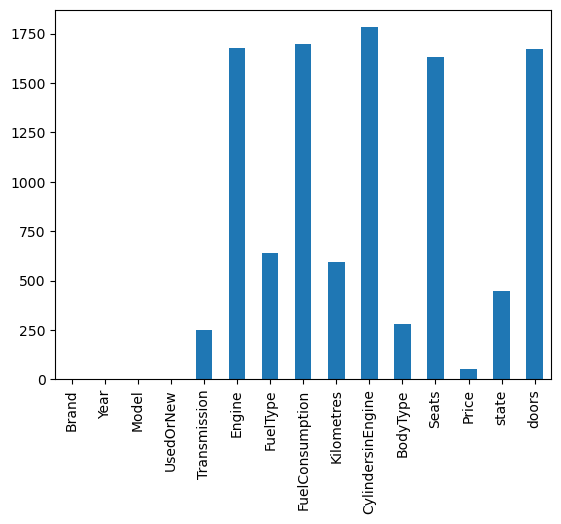

In [57]:
data.isnull().sum().plot.bar()
plt.show()

In [58]:
data.loc[2391]

Brand                NaN
Year                 NaN
Model                NaN
UsedOrNew            NaN
Transmission         NaN
Engine               NaN
FuelType             NaN
FuelConsumption      NaN
Kilometres           NaN
CylindersinEngine    NaN
BodyType             NaN
Seats                NaN
Price                NaN
state                NaN
doors                NaN
Name: 2391, dtype: object

In [59]:
data = data.drop(2391)

In [60]:
data.isnull().sum()

Brand                   0
Year                    0
Model                   0
UsedOrNew               0
Transmission          251
Engine               1675
FuelType              637
FuelConsumption      1697
Kilometres            591
CylindersinEngine    1781
BodyType              281
Seats                1633
Price                  52
state                 449
doors                1674
dtype: int64

In [61]:
data.dropna(subset=['Price'], inplace = True)

In [62]:
data['Transmission'].describe()

count         16438
unique            2
top       Automatic
freq          14488
Name: Transmission, dtype: object

In [63]:

data['Transmission' ]= data['Transmission'].fillna('Automatic')

In [64]:
data['Engine'].describe()

count     15022
unique       65
top           2
freq       3940
Name: Engine, dtype: object

In [65]:
data['Engine'].describe()
#data['Engine' ]= data['Engine'].fillna(data['Engine'].median)
data["Engine"] = data["Engine"].replace(np.NaN, data["Engine"].median())

In [66]:
data['FuelType'].describe()

count        16049
unique           8
top       Unleaded
freq          6962
Name: FuelType, dtype: object

In [67]:
data['FuelType' ]= data['FuelType'].fillna('Unleaded')

In [68]:
data['FuelConsumption'].describe()

count     15000
unique      156
top         7.4
freq        710
Name: FuelConsumption, dtype: object

In [69]:
data['FuelConsumption'].describe()
data['FuelConsumption' ]= data['FuelConsumption'].fillna(data['FuelConsumption'].median())

In [70]:
data['Kilometres'].describe()

count     16106
unique    14254
top          10
freq        126
Name: Kilometres, dtype: object

In [71]:
data['Kilometres' ]= data['Kilometres'].fillna(0)

In [72]:
data['CylindersinEngine'].describe()

count     14916
unique        8
top           4
freq      11471
Name: CylindersinEngine, dtype: object

In [73]:
data['CylindersinEngine' ]= data['CylindersinEngine'].fillna(data['CylindersinEngine'].median())

In [74]:
data['BodyType'].describe()

count     16402
unique       10
top         SUV
freq       6886
Name: BodyType, dtype: object

In [75]:
data['BodyType' ]= data['BodyType'].fillna('SUV')

In [76]:
data['Seats'].unique()

array([7.0, 5.0, 4.0, nan, 2.0, 3.0, 14.0, 8.0, 6.0, '7', '5', 9.0, '4',
       11.0, 12.0, 22.0, 15.0, '8', '2', '9', '6', '3', '12'],
      dtype=object)

In [77]:
data['Seats' ]= data['Seats'].fillna(5)

In [78]:
data['doors'].unique()

array(['4', '5', '2', nan, '3'], dtype=object)

In [79]:
data['doors' ]= data['doors'].fillna(4)

In [80]:
data.dropna(subset=['state'], inplace=True)

In [81]:
data.isna().sum()

Brand                0
Year                 0
Model                0
UsedOrNew            0
Transmission         0
Engine               0
FuelType             0
FuelConsumption      0
Kilometres           0
CylindersinEngine    0
BodyType             0
Seats                0
Price                0
state                0
doors                0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16232 entries, 0 to 16733
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16232 non-null  object 
 1   Year               16232 non-null  float64
 2   Model              16232 non-null  object 
 3   UsedOrNew          16232 non-null  object 
 4   Transmission       16232 non-null  object 
 5   Engine             16232 non-null  object 
 6   FuelType           16232 non-null  object 
 7   FuelConsumption    16232 non-null  object 
 8   Kilometres         16232 non-null  object 
 9   CylindersinEngine  16232 non-null  object 
 10  BodyType           16232 non-null  object 
 11  Seats              16232 non-null  object 
 12  Price              16232 non-null  float64
 13  state              16232 non-null  object 
 14  doors              16232 non-null  object 
dtypes: float64(2), object(13)
memory usage: 2.0+ MB


In [83]:
data

Brand    Year    Model UsedOrNew Transmission Engine  FuelType  \
0          Ssangyong  2022.0   Rexton      DEMO    Automatic    2.2    Diesel   
1                 MG  2022.0      MG3      USED    Automatic    1.5   Premium   
2                BMW  2022.0     430I      USED    Automatic      2   Premium   
3      Mercedes-Benz  2011.0     E500      USED    Automatic    5.5   Premium   
4            Renault  2022.0   Arkana      USED    Automatic    1.3  Unleaded   
...              ...     ...      ...       ...          ...    ...       ...   
16729         Toyota  2014.0  Alphard      USED    Automatic    2.2  Unleaded   
16730  Mercedes-Benz  2012.0  S-Class      USED    Automatic    2.2    Diesel   
16731         Suzuki  2022.0   Vitara      DEMO    Automatic    1.6  Unleaded   
16732  Mercedes-Benz  2016.0   GLC250      USED    Automatic      2   Premium   
16733  Mercedes-Benz  2021.0     C200      USED    Automatic      2  Unleaded   

      FuelConsumption Kilometres CylindersinEngine    BodyType Seats  \
0                 8.7       5595                 4         SUV   7.0   
1                 6.7         16                 4   Hatchback   5.0   
2                 6.6       8472                 4       Coupe   4.0   
3                  11     136517                 8       Coupe   4.0   
4                   6       1035                 4         SUV   5.0   
...               ...        ...               ...         ...   ...   
16729             7.6      66000               4.0  Commercial     7   
16730             7.6     117432               4.0         SUV     5   
16731             6.2       5165                 4         SUV   5.0   
16732             7.2      85525                 4         SUV   5.0   
16733               7      31852                 4       Sedan   5.0   

          Price state doors  
0       51990.0   NSW     4  
1       19990.0   NSW     5  
2      108988.0   NSW     2  
3       32990.0   NSW     2  
4       34990.0   NSW     4  
...         ...   ...   ...  
16729   29500.0   QLD     4  
16730   39888.0   VIC     4  
16731   35280.0   QLD     4  
16732   41888.0   QLD     4  
16733   65888.0   QLD     4  

[16232 rows x 15 columns]

#### change objects to float or int when needed:

In [84]:
data['Year']= data['Year'].astype(int)

In [85]:
data['Engine'] = data['Engine'].astype(float)

In [86]:
data['FuelConsumption'] = pd.to_numeric(data['FuelConsumption'],errors = 'coerce')

In [87]:
data['Kilometres'] = pd.to_numeric(data['Kilometres'],errors = 'coerce')

In [88]:
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'],errors = 'coerce')

In [89]:
data['Seats'] = pd.to_numeric(data['Seats'],errors = 'coerce')

In [90]:
data['Seats'] = data['Seats'].astype('int')

In [91]:
data['doors'] = pd.to_numeric(data['doors'],errors = 'coerce')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16232 entries, 0 to 16733
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16232 non-null  object 
 1   Year               16232 non-null  int32  
 2   Model              16232 non-null  object 
 3   UsedOrNew          16232 non-null  object 
 4   Transmission       16232 non-null  object 
 5   Engine             16232 non-null  float64
 6   FuelType           16232 non-null  object 
 7   FuelConsumption    16232 non-null  float64
 8   Kilometres         16232 non-null  int64  
 9   CylindersinEngine  16232 non-null  float64
 10  BodyType           16232 non-null  object 
 11  Seats              16232 non-null  int32  
 12  Price              16232 non-null  float64
 13  state              16232 non-null  object 
 14  doors              16232 non-null  int64  
dtypes: float64(4), int32(2), int64(2), object(7)
memory usage: 1.9+ MB


In [93]:
data.describe()

Year        Engine  FuelConsumption     Kilometres  \
count  16232.000000  16232.000000     16232.000000   16232.000000   
mean    2016.026922      2.372930         7.722277   99511.535917   
std        5.188999      0.840919         2.093961   78368.752521   
min     1940.000000      0.000000         0.000000       0.000000   
25%     2013.000000      2.000000         6.700000   39800.500000   
50%     2017.000000      2.200000         7.600000   85426.500000   
75%     2020.000000      2.700000         8.600000  146020.000000   
max     2023.000000      7.300000        27.000000  533849.000000   

       CylindersinEngine         Seats         Price         doors  
count       16232.000000  16232.000000  1.623200e+04  16232.000000  
mean            4.401121      5.111385  3.540193e+04      4.020700  
std             1.000502      1.039501  3.215227e+04      0.635693  
min             2.000000      2.000000  8.800000e+01      2.000000  
25%             4.000000      5.000000  1.899000e+04      4.000000  
50%             4.000000      5.000000  2.899000e+04      4.000000  
75%             4.000000      5.000000  4.290175e+04      4.000000  
max            12.000000     22.000000  1.500000e+06      5.000000

### check outliers:

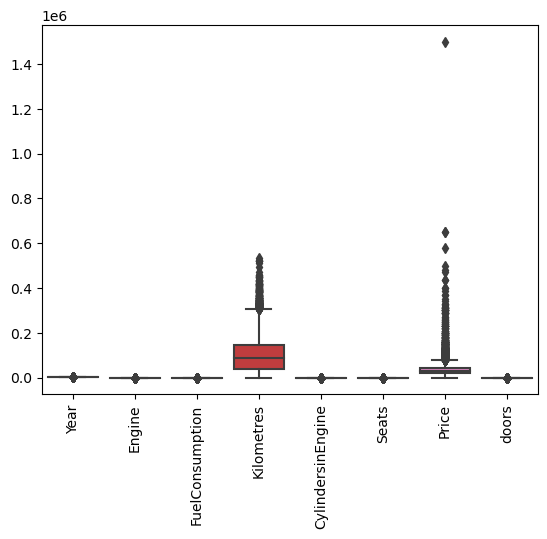

In [94]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [95]:
data['Price'].sort_values(ascending = False)

15313    1500000.0
3357      649880.0
10358     649880.0
5271      579888.0
3837      499990.0
           ...    
1747        1895.0
4862        1895.0
13203       1200.0
12460        900.0
15831         88.0
Name: Price, Length: 16232, dtype: float64

#### price column has one outlier so we can remove or replace with proper value.
#### so, we can remove 15313 row from our dataset. 

In [96]:
data = data.drop(15313)

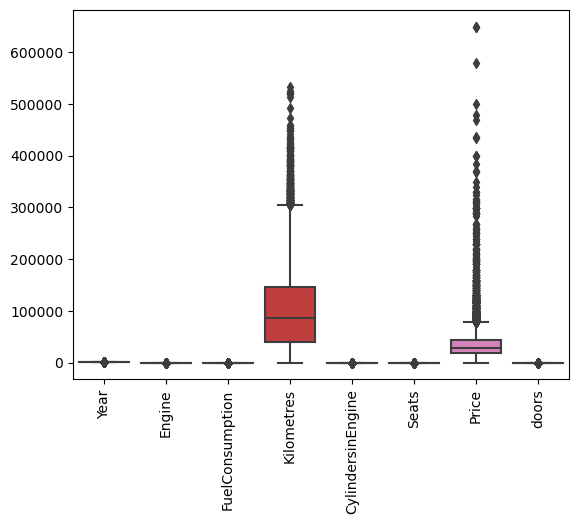

In [97]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

### multicolinarity

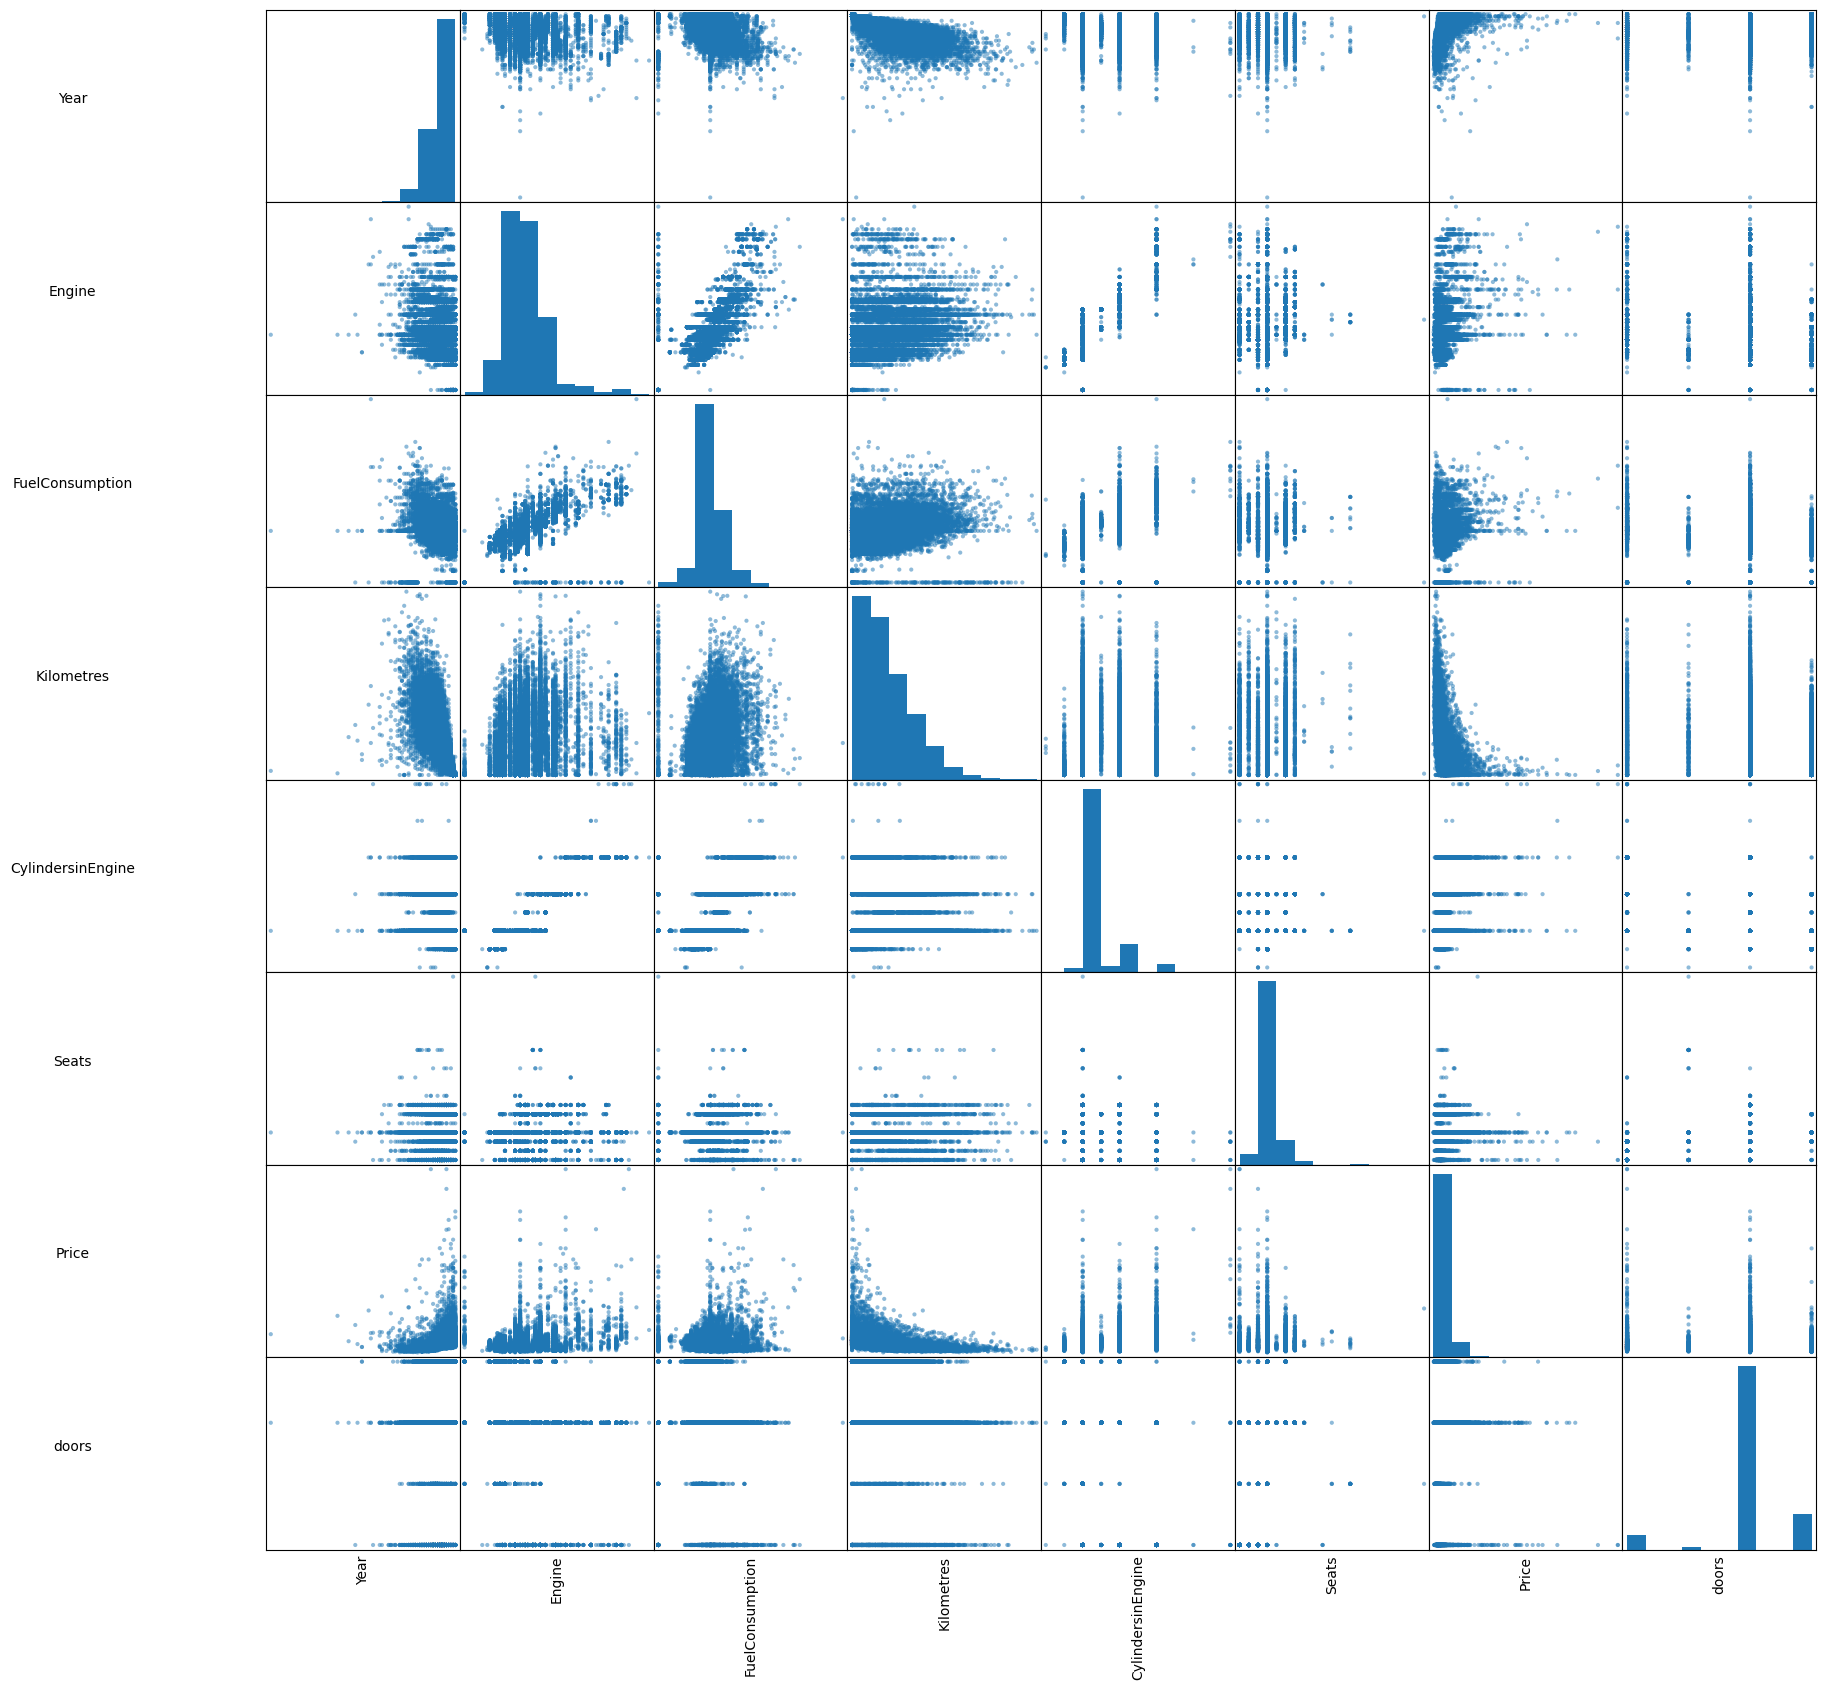

In [98]:
sm = pd.plotting.scatter_matrix(data, figsize=[20, 20]);
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

In [99]:
data.corr()

Year    Engine  FuelConsumption  Kilometres  \
Year               1.000000 -0.215908        -0.242637   -0.714427   
Engine            -0.215908  1.000000         0.651927    0.249919   
FuelConsumption   -0.242637  0.651927         1.000000    0.227486   
Kilometres        -0.714427  0.249919         0.227486    1.000000   
CylindersinEngine -0.190448  0.834206         0.540666    0.146335   
Seats              0.039232  0.062878         0.047117   -0.000358   
Price              0.403166  0.251440         0.078763   -0.424237   
doors              0.106651 -0.300247        -0.252178   -0.123117   

                   CylindersinEngine     Seats     Price     doors  
Year                       -0.190448  0.039232  0.403166  0.106651  
Engine                      0.834206  0.062878  0.251440 -0.300247  
FuelConsumption             0.540666  0.047117  0.078763 -0.252178  
Kilometres                  0.146335 -0.000358 -0.424237 -0.123117  
CylindersinEngine           1.000000  0.026938  0.320238 -0.235859  
Seats                       0.026938  1.000000  0.017237  0.348662  
Price                       0.320238  0.017237  1.000000 -0.119392  
doors                      -0.235859  0.348662 -0.119392  1.000000

<Axes: >

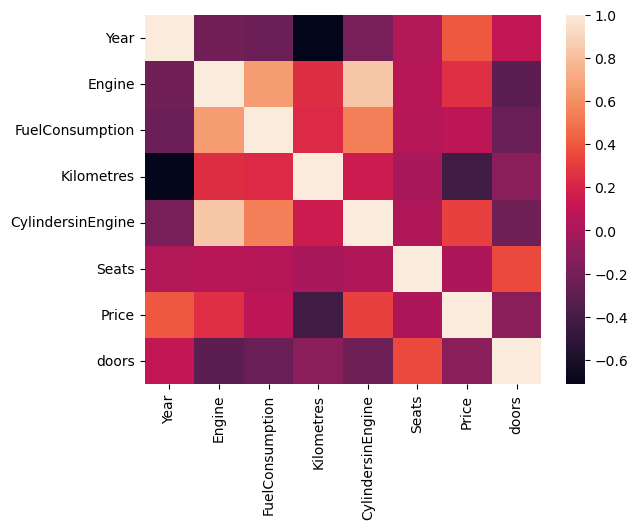

In [100]:
sns.heatmap(data.corr())

In [101]:
#check correlation is more than 75
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [102]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                
(CylindersinEngine, Engine)  0.834206

##### here Engine and CylindersinEngin columns are 84.7% correlated to each other 
##### so, we need to remove one cloumn from our dataset. Cylindersinengine column is droping from our dataset.

In [103]:
data = data.drop(['CylindersinEngine'], axis=1)

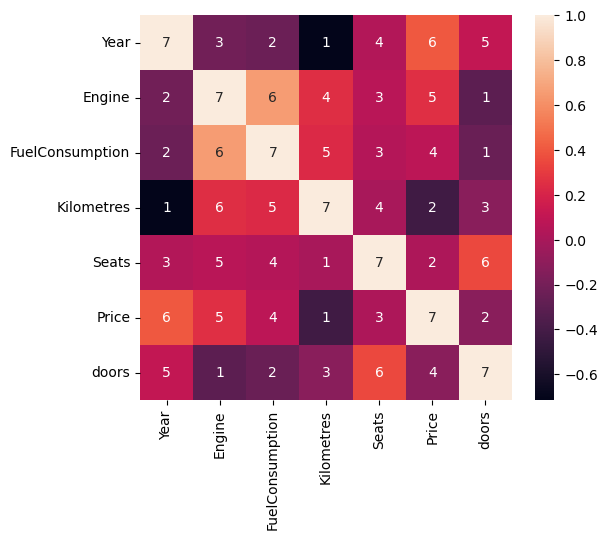

In [104]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=data.corr().rank(axis="columns"))
plt.show()

### check some relationships with data:

##### top 10 cars with count

In [105]:
brands = data['Brand']
unique_brands = np.unique(brands) 

brand_counts = dict(data['Brand'].value_counts())


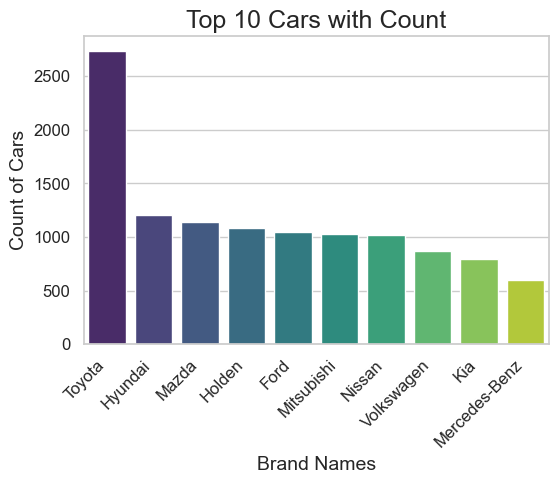

In [106]:
x = list(brand_counts.keys())[:10]
height = list(brand_counts.values())[:10]
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=x, y=height, palette="viridis")
plt.title("Top 10 Cars with Count", fontsize=18)
plt.xlabel("Brand Names", fontsize=14)
plt.ylabel("Count of Cars", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### car price 

In [107]:
import plotly.express as px
fig1 = px.histogram(data, x="Price", nbins=10, title="Distribution of Car Prices")
fig1.show()

##### engine capacity vs car price 

In [108]:
fig6 = px.scatter(data, x='Engine', y='Price', color='Brand',
                  title='Engine Capacity vs. Car Price', labels={'Engine': 'Engine Capacity (L or kW)'})
fig6.show()

### Dealing with categorical variables:

##### label encoding

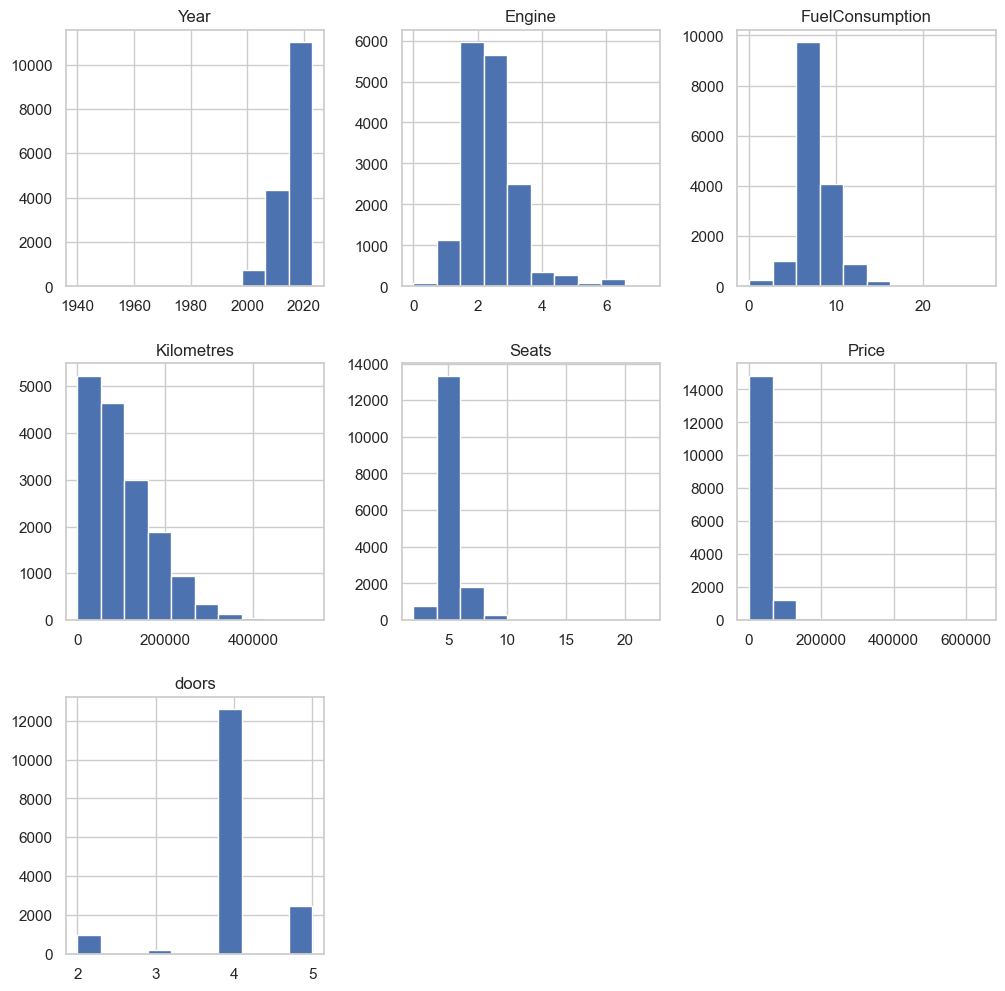

In [109]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax = ax);

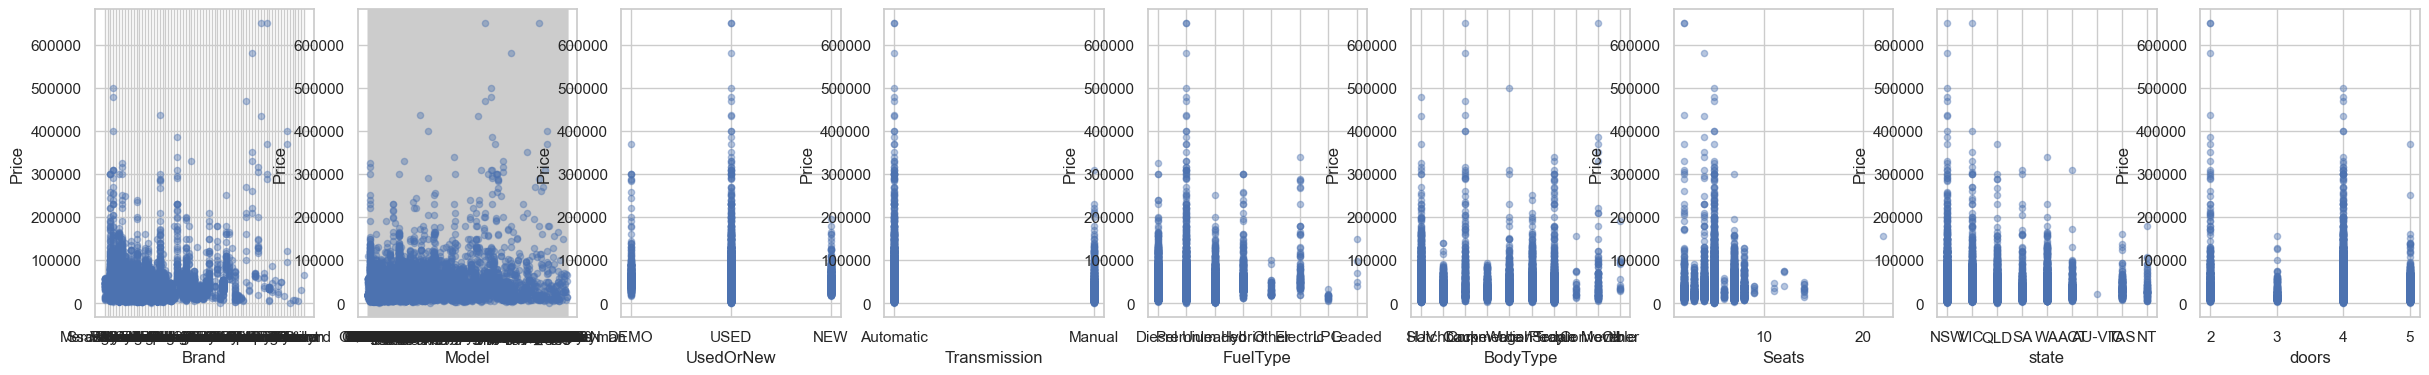

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30,4))

for xcol, ax in zip([ 'Brand','Model','UsedOrNew','Transmission','FuelType','BodyType','Seats','state','doors'], axes):
    data.plot(kind='scatter', x=xcol, y='Price', ax=ax, alpha=0.4, color='b')

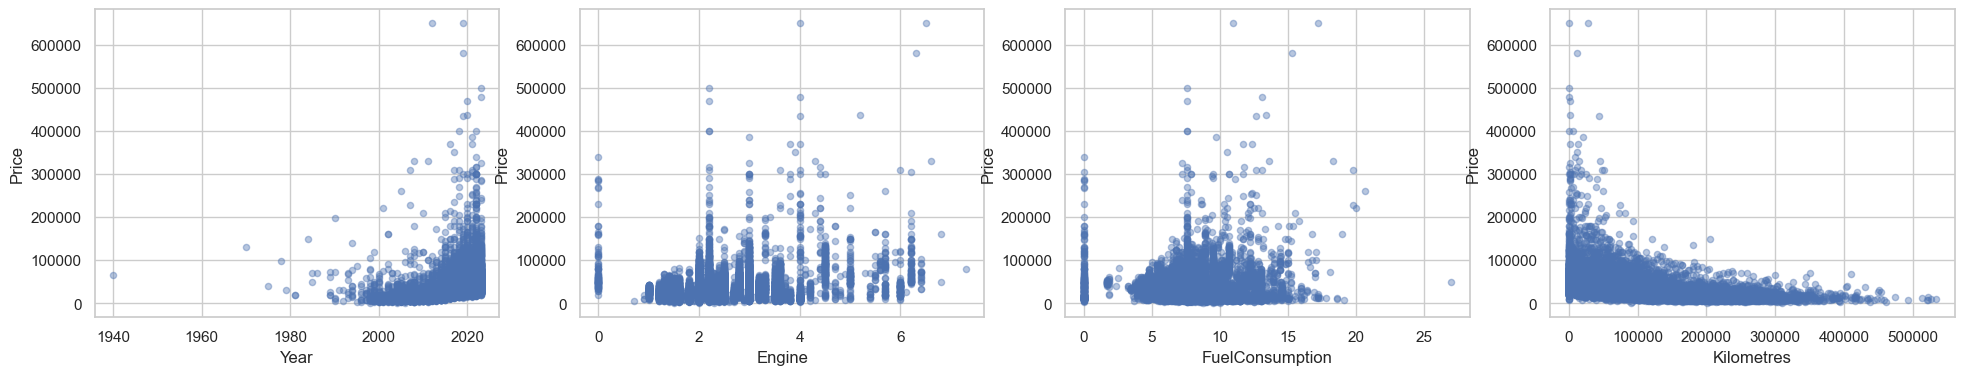

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,4))

for xcol, ax in zip([ 'Year', 'Engine', 'FuelConsumption', 'Kilometres'], axes):
    data.plot(kind='scatter', x=xcol, y='Price', ax=ax, alpha=0.4, color='b')

In [112]:
data.to_csv('cleaned car.csv')

In [113]:
categorials = data[['Brand','UsedOrNew','Transmission','FuelType','BodyType','Seats','state','doors']]

In [114]:
categorials.nunique()

Brand           70
UsedOrNew        3
Transmission     2
FuelType         8
BodyType        10
Seats           12
state            9
doors            4
dtype: int64

In [115]:
numaric = data[[ 'Year', 'Engine', 'FuelConsumption', 'Kilometres' , 'Price']]

In [116]:
categorials = categorials.astype(str)

In [117]:
categorials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16231 entries, 0 to 16733
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         16231 non-null  object
 1   UsedOrNew     16231 non-null  object
 2   Transmission  16231 non-null  object
 3   FuelType      16231 non-null  object
 4   BodyType      16231 non-null  object
 5   Seats         16231 non-null  object
 6   state         16231 non-null  object
 7   doors         16231 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [118]:
brand_dummies = pd.get_dummies(categorials.Brand, drop_first=True)
uandn_dummies = pd.get_dummies(categorials.UsedOrNew, drop_first=True)
tras_dummies = pd.get_dummies(categorials.Transmission)
fy_dummies = pd.get_dummies(categorials.FuelType, drop_first=True)
by_dummies = pd.get_dummies(categorials.BodyType, drop_first=True)
seats_dummies = pd.get_dummies(categorials.Seats, drop_first=True)
state_dummies = pd.get_dummies(categorials.state, drop_first=True)
doors_dummies = pd.get_dummies(categorials.doors, drop_first=True)

In [119]:
df = pd.concat([brand_dummies,uandn_dummies,tras_dummies,fy_dummies,by_dummies,seats_dummies,state_dummies,doors_dummies], axis =1)

In [120]:
df.head(3)

Alfa  Aston  Audi  BMW  BYD  Bentley  Chery  Chevrolet  Chrysler  Citroen  \
0     0      0     0    0    0        0      0          0         0        0   
1     0      0     0    0    0        0      0          0         0        0   
2     0      0     0    1    0        0      0          0         0        0   

   ...  NSW  NT  QLD  SA  TAS  VIC  WA  3  4  5  
0  ...    1   0    0   0    0    0   0  0  1  0  
1  ...    1   0    0   0    0    0   0  0  0  1  
2  ...    1   0    0   0    0    0   0  0  0  0  

[3 rows x 111 columns]

### modeling our data

In [121]:
#use ols regression model to get best fit line for numerical varables
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [122]:
from statsmodels.formula.api import ols
outcome = 'Price'
x_cols = numaric.drop('Price', axis= 1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=numaric).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     2143.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:29   Log-Likelihood:            -1.8693e+05
No. Observations:               16231   AIC:                         3.739e+05
Df Residuals:                   16226   BIC:                         3.739e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.631e+06   1.07e+05    -24.501      0.000   -2.84e+06   -2.42e+06
Year             1314.7040     53.098     24.760      0.000    1210.626    1418.782
Engine           1.548e+04    301.997     51.258      0.000    1.49e+04    1.61e+04
FuelConsumption  -976.4785    121.250     -8.053      0.000   -1214.143    -738.814
Kilometres         -0.1362      0.004    -38.769      0.000      -0.143      -0.129
==============================================================================
Omnibus:                    21585.594   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7236323.063
Skew:                           7.408   Prob(JB):                         0.00
Kurtosis:                     105.374   Cond. No.                     7.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here r_squared is 0.346 that means 34% of variations in dependent varable 'y' are explained by the independent variable in our model.
and skew and kurtosis are high
so to get better r_squared value we need to do normalization to our numerical variables

### Draw QQ-plot

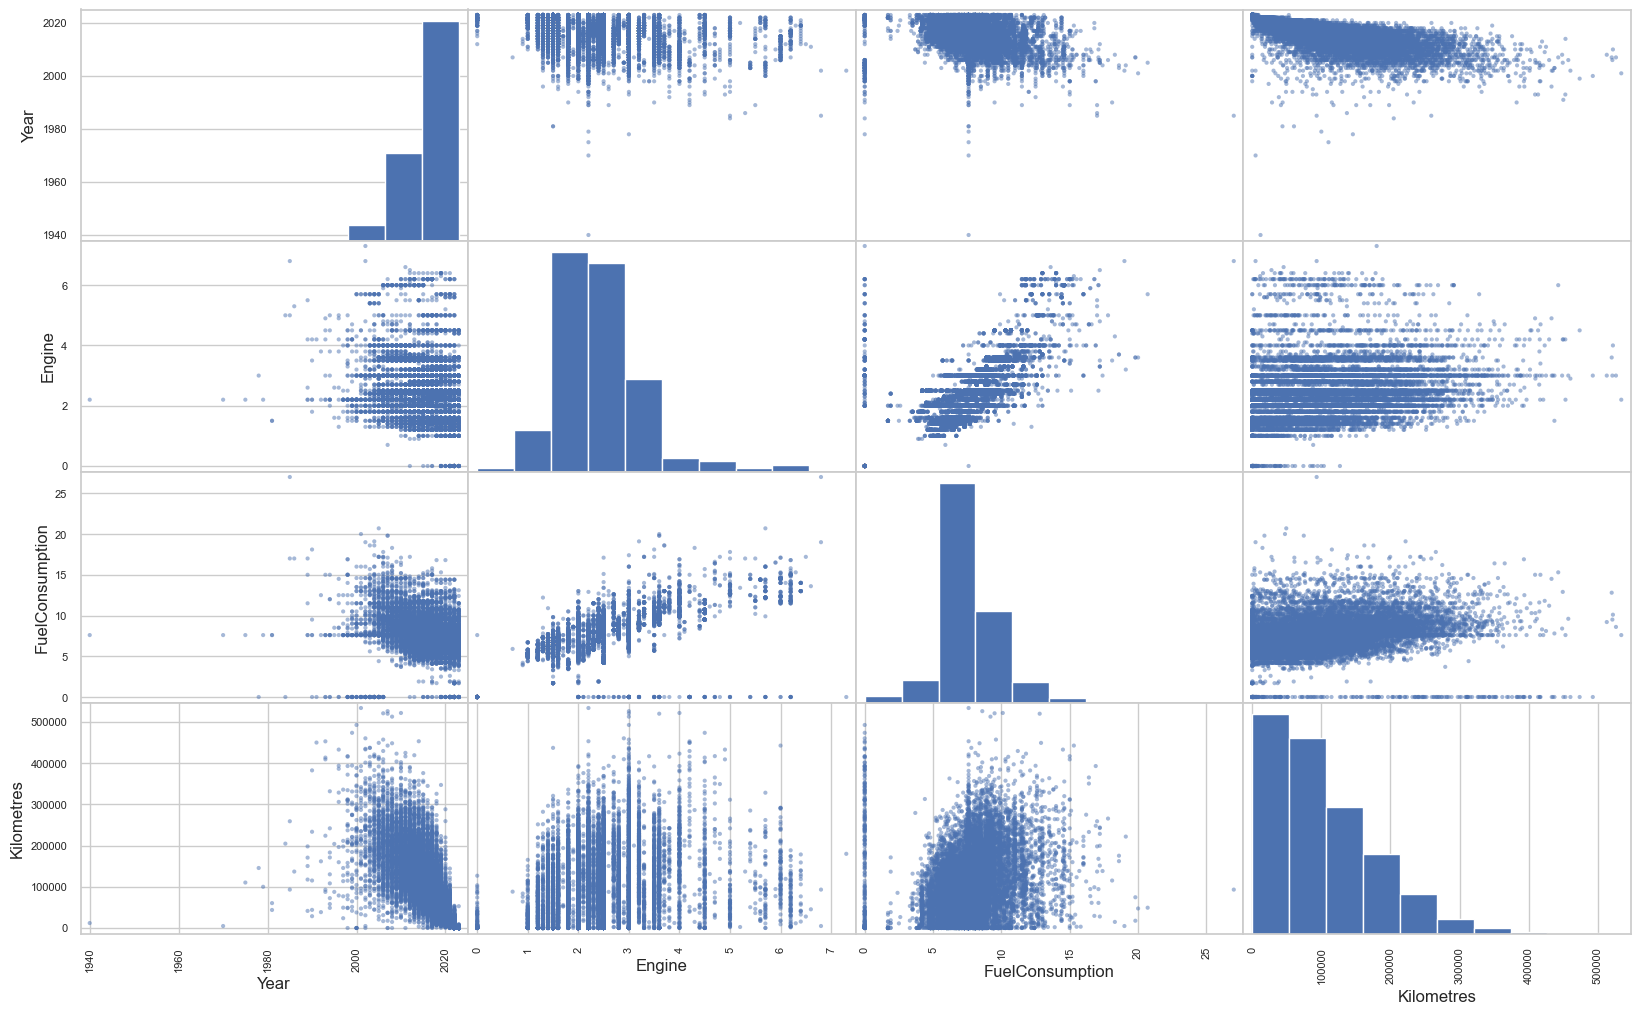

In [123]:
pd.plotting.scatter_matrix(x_cols, figsize=(20,12));

### combine catagorical data, dependent data and independent data into one big data and modeling our data

In [124]:
bigdata = pd.concat([numaric,df] , axis = 1)

In [129]:
bigdata.to_csv('Cleaned.csv')

In [130]:
bigdata.head(2)

Year  Engine  FuelConsumption  Kilometres    Price  Alfa  Aston  Audi  BMW  \
0  2022     2.2              8.7        5595  51990.0     0      0     0    0   
1  2022     1.5              6.7          16  19990.0     0      0     0    0   

   BYD  ...  NSW  NT  QLD  SA  TAS  VIC  WA  3  4  5  
0    0  ...    1   0    0   0    0    0   0  0  1  0  
1    0  ...    1   0    0   0    0    0   0  0  0  1  

[2 rows x 116 columns]

### splitting  train and test data 

In [131]:
X= bigdata.drop('Price' , axis = 1)
y = bigdata['Price']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
linreg = LinearRegression()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

### linear regression model

In [134]:
linreg.fit(X_train, y_train)

LinearRegression()

In [135]:
linreg.score(X_test, y_test)

0.5758262194987185

### model evaluation:

In [136]:
data_prediction = linreg.predict(X_test)

In [137]:
print(f'MSE :{mean_squared_error(y_test,data_prediction)}')
print(f'r2 :{r2_score(data_prediction,y_test)}')

MSE :433447303.8623847
r2 :0.28257188859942717


### find better  r2 value 

In [138]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Ada Boost': AdaBoostRegressor(),
    'Gradient Boost': GradientBoostingRegressor()
}

In [139]:
def evaluate_model(X_train, X_test, y_train, y_test, models):
    report = {}
    
    for i in range(len(models)):
        
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        test_model_score = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        report[list(models.keys())[i]] = {
            "Accuracy": test_model_score,
            "Mean Squared Error": mse,
            "Mean Absolute Error": mae
        }
    
    return report

In [140]:
model_matrics = evaluate_model(X_train, X_test, y_train, y_test, models)
for model, metrics in model_matrics.items():
    print(f"{model} Metrics:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"  Mean Absolute Error: {metrics['Mean Absolute Error']}")
    print("\n" + "=" * 30 + "\n")

Random Forest Metrics:
  Accuracy: 0.7459814567833132
  Mean Squared Error: 259572038.04111803
  Mean Absolute Error: 5742.797017555118


Decision Tree Metrics:
  Accuracy: 0.6225627946879685
  Mean Squared Error: 385688947.6443231
  Mean Absolute Error: 7476.427551439424


SVR Metrics:
  Accuracy: -0.01739669296993185
  Mean Squared Error: 1039639585.9385065
  Mean Absolute Error: 16564.432457619496


Linear Regression Metrics:
  Accuracy: 0.5758262194987185
  Mean Squared Error: 433447303.8623847
  Mean Absolute Error: 10106.251191414838


Ada Boost Metrics:
  Accuracy: -0.24118227874184917
  Mean Squared Error: 1268317696.7860696
  Mean Absolute Error: 27892.191262376065


Gradient Boost Metrics:
  Accuracy: 0.7247295486848722
  Mean Squared Error: 281288567.18705994
  Mean Absolute Error: 7830.180090493726




In [141]:
max_accuracy_model = max(model_matrics, key=lambda k: model_matrics[k]['Accuracy'])
max_accuracy_value = model_matrics[max_accuracy_model]['Accuracy']

print(f"The model with the highest accuracy is '{max_accuracy_model}' with an accuracy of {max_accuracy_value}.")

The model with the highest accuracy is 'Random Forest' with an accuracy of 0.7459814567833132.


In [142]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [143]:
rf_pred = model_rf.predict(X_test)

In [144]:
print(f'MSE :{mean_squared_error(y_test,rf_pred)}')
print(f'r2 :{r2_score(rf_pred,y_test)}')

MSE :257770081.21214715
r2 :0.6140366835768869


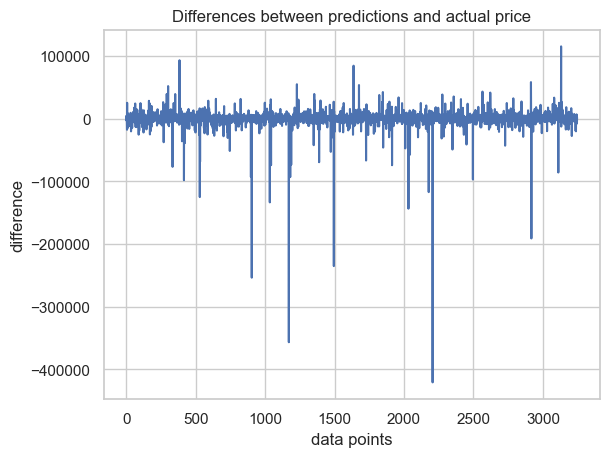

In [145]:
difference = rf_pred - y_test
plt.plot(np.arange(len(difference)), difference)
plt.xlabel('data points')
plt.ylabel('difference')
plt.title('Differences between predictions and actual price')
plt.show()

In [146]:
df_pred = pd.DataFrame(y_test)
df_pred['Predicted'] = rf_pred
df_pred = df_pred.reset_index()
df_pred

index    Price     Predicted
0       224  26990.0  24692.310000
1      8329  12999.0  17606.046667
2      6852  39999.0  38043.540000
3      2700  34990.0  38876.620000
4      6565  34990.0  33917.540000
...     ...      ...           ...
3242  11238  23999.0  31091.100000
3243   4069  25990.0  32436.470000
3244   2014  54050.0  59679.305000
3245   5675  89990.0  82458.376667
3246   9167   9990.0  12077.040000

[3247 rows x 3 columns]

<Axes: >

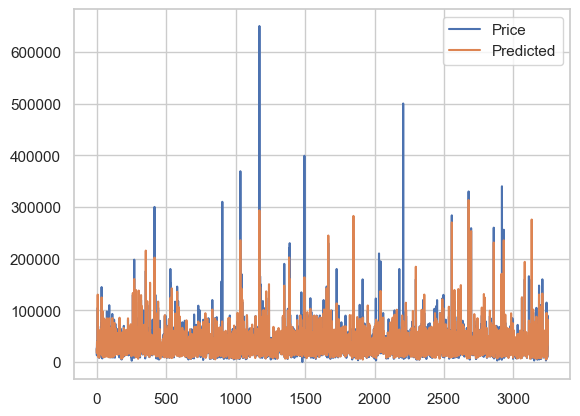

In [147]:
df_pred[['Price', 'Predicted']].plot()

In [148]:
def predict_price(Brand,UsedOrNew,Transmission,FuelType, BodyType, Seats, state, doors,Year,Engine,FuelConsumption,Kilometres):    
    loc_index = np.where(X.columns==Brand)[0][0]
    loc_index1 = np.where(X.columns==UsedOrNew)[0][0]
    loc_index2 = np.where(X.columns==Transmission)[0][0]
    loc_index3 = np.where(X.columns==FuelType)[0][0]
    loc_index4 = np.where(X.columns==BodyType)[0][0]
    loc_index5 = np.where(X.columns==Seats)[0][0]
    loc_index6 = np.where(X.columns==state)[0][0]
    loc_index7 = np.where(X.columns==doors)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = Year
    x[1] = Engine
    x[2] = FuelConsumption
    x[3] = Kilometres
    if loc_index >= 0:
        x[loc_index] = 1
        x[loc_index1] = 1
        x[loc_index2] = 1
        x[loc_index3] = 1
        x[loc_index4] = 1
        x[loc_index5] = 1
        x[loc_index6] = 1
        x[loc_index7] = 1
    return model_rf.predict([x])[0]

In [149]:
predict_price("Audi",'NEW','Manual','Unleaded', 'SUV','7', 'NSW', '4', 2023, 2, 4.2,23446)

37487.12

In [150]:
predict_price("Alfa",'NEW','Manual','Unleaded', 'SUV','7', 'NSW', '4', 2023, 2, 4.2,23446)

37487.12

In [151]:
X.columns

Index(['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'Alfa', 'Aston',
       'Audi', 'BMW', 'BYD', 'Bentley',
       ...
       'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA', '3', '4', '5'],
      dtype='object', length=115)

In [152]:
import pickle
with open('car_prices_model.pickle','wb') as f:
    pickle.dump(model_rf,f)

In [153]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))